In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df_train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [7]:
df_train = df_train.drop(['keyword','location', 'id'], axis = 1)

In [8]:
df_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [9]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [10]:
df_test = df_test.drop(['keyword','location', 'id'], axis = 1)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3263 non-null   object
dtypes: object(1)
memory usage: 25.6+ KB


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(stop_words='english')

In [15]:
import warnings
warnings.filterwarnings('ignore')
matrix = cv.fit_transform(df_train[df_train['target']==1]['text'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words for disaster")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words for disaster
[('http', 2382), ('û_', 172), ('news', 140), ('amp', 135), ('https', 134), ('disaster', 121), ('california', 115), ('suicide', 112), ('police', 109), ('people', 105), ('killed', 95), ('like', 94), ('hiroshima', 92), ('just', 89), ('storm', 89), ('fires', 86), ('crash', 85), ('families', 81), ('train', 79), ('emergency', 77)]


In [16]:
matrix = cv.fit_transform(df_train[df_train['target']==0]['text'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    

print("Top 20 words used for no disaster.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for no disaster.
[('http', 1927), ('https', 277), ('like', 254), ('just', 234), ('amp', 209), ('û_', 176), ('new', 170), ('don', 138), ('body', 116), ('video', 96), ('people', 95), ('love', 90), ('day', 86), ('know', 86), ('time', 85), ('got', 84), ('emergency', 81), ('going', 76), ('let', 76), ('youtube', 76)]


In [17]:
X = df_train['text']
y = df_train['target']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train = df_train['text']
y_train = df_train['target']
X_test = df_test['text']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [22]:
tfidf = TfidfVectorizer()

In [23]:
X_train

7028    Obama Declares Disaster for Typhoon-Devastated...
5720    VIDEO: 'We're picking up bodies from water': R...
1775    South Sac I5 S / I5 S 43rd Ave Ofr **Trfc Coll...
6622    http://t.co/EQjCpWILVn: Articles In Saudi Pres...
3312    US govt refuses to evacuate 1000s of Americans...
                              ...                        
5253    Plains All American Pipeline company may have ...
3017    6 Things Getting Caught in a Dust Storm &amp; ...
2762    70 Years After Atomic Bombs Japan Still Strugg...
6971    I liked a @YouTube video http://t.co/0h7OUa1pn...
1120    @antpips67 @JohnEJefferson obviously I'm aware...
Name: text, Length: 6851, dtype: object

In [24]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_val_tfidf = tfidf.transform(X_val)
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()
X_val_tfidf = X_val_tfidf.toarray()

In [25]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
X_train_tfidf.shape

(6851, 20121)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(units = 1, activation='relu', input_dim = X_train_tfidf.shape[1]),
    keras.layers.Dense(units = 8, activation='relu'),
    keras.layers.Dense(units = 16, activation='relu'),
    keras.layers.Dense(units = 32, activation='relu'),
    keras.layers.Dense(units = 64, activation='relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train_tfidf, y_train, epochs=50)

Epoch 1/50
215/215 [==============================] - 1s 1ms/step - loss: 0.6384 - accuracy: 0.6161
Epoch 2/50
215/215 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8717
Epoch 3/50
215/215 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9461
Epoch 4/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9788
Epoch 5/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9876
Epoch 6/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9910
Epoch 7/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9934
Epoch 8/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9931
Epoch 9/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9931
Epoch 10/50
215/215 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9939

In [32]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [33]:
y_pred_prob = model.predict(X_test_tfidf)

102/102 [==============================] - 0s 1ms/step


In [34]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [35]:
y_pred_prob1 = model.predict(X_val_tfidf)

24/24 [==============================] - 0s 986us/step


In [36]:
y_pred1 = (y_pred_prob1 > 0.5).astype(int)

In [37]:
print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       454
           1       0.65      0.69      0.67       308

    accuracy                           0.72       762
   macro avg       0.72      0.72      0.72       762
weighted avg       0.73      0.72      0.73       762



In [38]:
sub = pd.read_csv('sample_submission.csv')

In [39]:
sub['id'].shape

(3263,)

In [40]:
y_pred.shape

(3263, 1)

In [41]:
y_pred = y_pred.flatten()

In [42]:
y_pred.shape

(3263,)

In [43]:
sub['target'] = y_pred

In [44]:
sub.to_csv('nn.csv', index=False, index_label=False)

# Naive Bayes

In [46]:
X = df_train['text']
y = df_train['target']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [50]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('nb', MultinomialNB())])

In [51]:
params = {
    'nb__alpha':[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0],
    'nb__fit_prior':[True, False], 
    'nb__class_prior':[None, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0]
}

In [52]:
full_model = GridSearchCV(pipe, param_grid=params, cv = 3, verbose = 2)

In [53]:
full_model.fit(X_train, y_train)  

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END nb__alpha=0.1, nb__class_prior=None, nb__fit_prior=True; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=None, nb__fit_prior=True; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=None, nb__fit_prior=True; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=None, nb__fit_prior=False; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=None, nb__fit_prior=False; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=None, nb__fit_prior=False; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=0.2, nb__fit_prior=True; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=0.2, nb__fit_prior=True; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=0.2, nb__fit_prior=True; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=0.2, nb__fit_prior=False; total time=   0.0s
[CV] END nb__alpha=0.1, nb__class_prior=0.2, nb__fit_prior=False; total time=   0.0s
[CV

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 1.0],
                         'nb__class_prior': [None, 0.2, 0.3, 0.4, 0.5, 0.7,
                                             1.0],
                         'nb__fit_prior': [True, False]},
             verbose=2)

In [54]:
full_model.best_params_

{'nb__alpha': 0.6, 'nb__class_prior': None, 'nb__fit_prior': True}

In [55]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [56]:
pipe

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [57]:
preds = full_model.predict(X_test)

In [58]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1330
           1       0.82      0.65      0.73       954

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.78      2284
weighted avg       0.80      0.80      0.79      2284



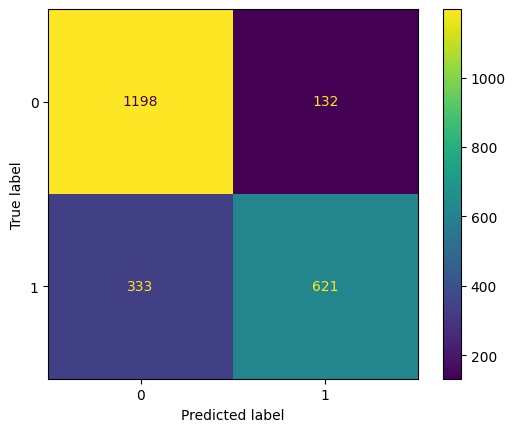

In [59]:
plot_confusion_matrix(full_model,X_test,y_test)

In [60]:
sub = pd.read_csv('sample_submission.csv')

In [61]:
sub['target'] = y_pred

In [63]:
sub.to_csv('nb.csv', index=False, index_label=False)